<a href="https://colab.research.google.com/github/GursimranKaur12/Assignment-/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
trader_data = pd.read_csv('historical_data.csv')

In [6]:
sentiment_data = pd.read_csv('fear_greed_index.csv')

In [9]:
print(trader_data.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [10]:
print(sentiment_data.head)

<bound method NDFrame.head of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>


In [14]:
trader_data['time'] = pd.to_datetime(trader_data['Timestamp IST'], format="%d-%m-%Y %H:%M", dayfirst=True)
trader_data['date'] = trader_data['time'].dt.date

sentiment_data['Date'] = pd.to_datetime(sentiment_data['date']).dt.date

# Merge on date
merged = pd.merge(trader_data, sentiment_data, left_on='date', right_on='Date', how='left')

# Check merged data
print(merged[['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Side', 'date_x', 'classification', 'Closed PnL']].head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens Side      date_x classification  Closed PnL  
0       986.87  BUY  2024-12-02  Extreme Greed         0.0  
1        16.00  BUY  2024-12-02  Extreme Greed         0.0  
2       144.09  BUY  2024-12-02  Extreme Greed         0.0  
3       142.98  BUY  2024-12-02  Extreme Greed         0.0  
4         8.73  BUY  2024-12-02  Extreme Greed         0.0  


In [16]:
grouped = merged.groupby('classification')
performance = grouped['Closed PnL'].agg(['mean', 'median', 'std', 'count'])
performance['win_rate'] = grouped.apply(lambda x: (x['Closed PnL'] > 0).mean())
performance['avg_leverage'] = grouped['Start Position'].mean()
performance['avg_trade_size'] = grouped['Size Tokens'].mean()

print(performance)

                      mean    median          std  count  win_rate  \
classification                                                       
Extreme Fear    198.456185  0.000000  2508.465987    647  0.315301   
Extreme Greed    33.592341  0.000000   175.430976    640  0.165625   
Fear             79.542449  0.000000   599.960527   6535  0.388217   
Greed            58.559994  0.000000   434.252071   3796  0.350105   
Neutral         140.872824  0.039375   672.129643   2245  0.516258   

                avg_leverage  avg_trade_size  
classification                                
Extreme Fear    16990.582744     2357.522018  
Extreme Greed    2398.942883      133.329076  
Fear             5416.268693      619.722711  
Greed           11114.602098     1068.763314  
Neutral          7143.282618      110.683852  


/tmp/ipython-input-16-3107283241.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  performance['win_rate'] = grouped.apply(lambda x: (x['Closed PnL'] > 0).mean())


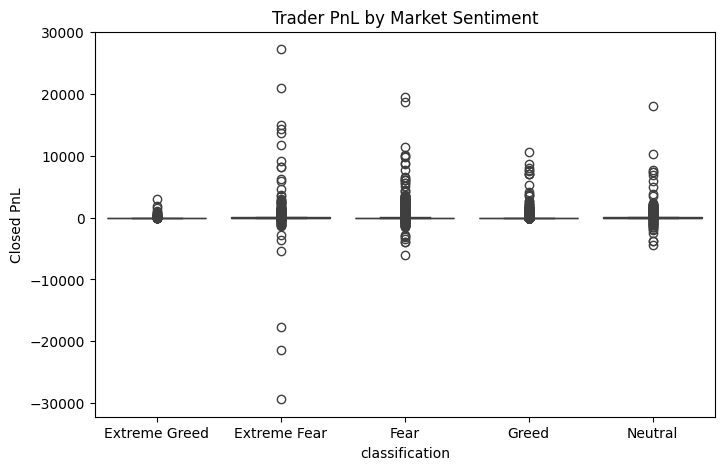

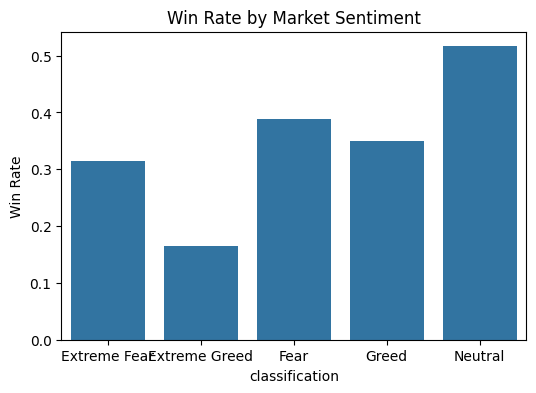

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title('Trader PnL by Market Sentiment')
plt.show()

# Barplot of win rate by sentiment
plt.figure(figsize=(6, 4))
sns.barplot(x=performance.index, y=performance['win_rate'])
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate')
plt.show()

In [20]:
fear_pnl = merged[merged['classification'] == 'Fear']['Closed PnL'].dropna()
greed_pnl = merged[merged['classification'] == 'Greed']['Closed PnL'].dropna()

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)
print(f"T-test: t_stat={t_stat:.3f}, p_value={p_value:.3f}")

T-test: t_stat=2.050, p_value=0.040


In [21]:
performance.to_csv('trader_performance_by_sentiment.csv')